In [8]:
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

In [18]:
uploader = widgets.FileUpload(accept='.jpg', multiple=False)
display(uploader)

FileUpload(value={}, accept='.jpg', description='Upload')

In [10]:
def convert_upload(upload):
    file = upload
    file_name = str(list(file.keys())[0])
    bytes_image = file[file_name]['content']
    PIL_image = Image.open(io.BytesIO(bytes_image))
    return PIL_image

In [19]:
PIL_image = convert_upload(uploader.value)

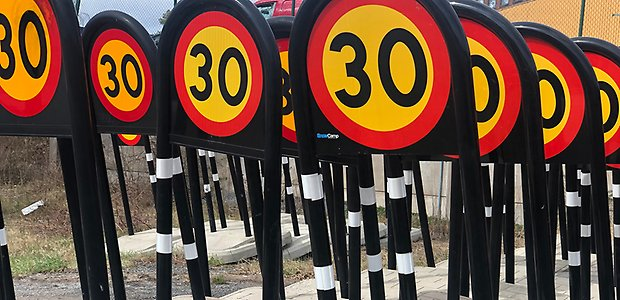

In [20]:
PIL_image

In [21]:
print(PIL_image.size)
print(PIL_image.height)
print(PIL_image.width)
print(PIL_image.format)
print(PIL_image.mode)

(620, 300)
300
620
JPEG
RGB


In [22]:
uploader.close()

In [25]:
import torch
from torchvision.transforms import transforms

from application.src.models.faster_rcnn import RCNNModel
from application.src.utils.presentation import get_relevant_scores, show

In [16]:
def load_model():
    from application.src.config import DEVICE, MODEL_NAME, OUT_DIR

    model_path = str(OUT_DIR) + '/' + str(MODEL_NAME) + '.pth'

    nm = RCNNModel()
    nm.model.load_state_dict(torch.load(model_path, map_location=DEVICE))
    nm.model.eval()

    return nm

def print_result(labels: list, scores=None) -> None:
    """
    Print the labels and, if we predict a random image, the accuracy score.
    Only prints the signs that with more than 60% accuracy
    :param labels: list; list with the predicted or actual signs
    :param scores: list[int]; list with accuracy scores, only when predicted. None by default
    :return: None
    """
    if scores:
        [print(f'Sign: {label} - Accuracy: {scores[i]}%') for i, label in enumerate(labels)]
    else:
        [print(f'Sign: {label}') for label in labels]

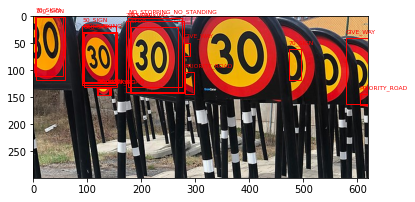

Sign: 70_SIGN - Accuracy: 95%
Sign: 70_SIGN - Accuracy: 92%
Sign: GIVE_WAY - Accuracy: 68%
Sign: 70_SIGN - Accuracy: 48%
Sign: GIVE_WAY - Accuracy: 36%
Sign: NO_PARKING - Accuracy: 27%
Sign: 70_SIGN - Accuracy: 22%
Sign: NO_PARKING - Accuracy: 15%
Sign: 100_SIGN - Accuracy: 12%
Sign: 100_SIGN - Accuracy: 11%
Sign: NO_STOPPING_NO_STANDING - Accuracy: 11%
Sign: PRIORITY_ROAD - Accuracy: 8%
Sign: 50_SIGN - Accuracy: 6%
Sign: 50_SIGN - Accuracy: 6%
Sign: GIVE_WAY - Accuracy: 6%
Sign: NO_PARKING - Accuracy: 6%
Sign: PRIORITY_ROAD - Accuracy: 6%
Sign: STOP - Accuracy: 5%
Sign: PRIORITY_ROAD - Accuracy: 5%


In [29]:
model = load_model()
transform = transforms.Compose([transforms.ToTensor()])

image = transform(PIL_image)
image = image.view(1, 3, image.shape[1], image.shape[2])

labels, scores, boxes = model.predict(image)

# labels, scores, boxes = get_relevant_scores(labels, scores, boxes)

show(image, labels, boxes)
print_result(labels, scores)